In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
from Data_definition import Data
from functions import computeCurrents, dydt

T  = 600
dt = 0.01

In [3]:
# res = scipy.optimize.root(lambda y: dydt(1000*T, y, Data),
#                           x0 = [-60, -60, 0.5, 0.5, 0.5, 0.5, 0.5, 0],
#                           method='lm')
# print(res.x)
# y_init = res.x

y_init = np.array([Data['initial_VS'],
                   Data['initial_VD'],
                   Data['initial_w' ],
                   Data['initial_n' ],
                   Data['initial_h' ],
                   Data['initial_c' ],
                   Data['initial_q' ],
                   Data['initial_Ca']])

t_span = (0, T)
t_eval = np.arange(*t_span, dt)

sol = scipy.integrate.solve_ivp(fun = lambda t, y: dydt(t, y, Data),
                                t_span = t_span,
                                y0 = y_init,
                                t_eval = t_eval,
                                method = 'RK45',
                                atol = 1e-6,
                                rtol = 1e-6)

if not sol.success:
    raise RuntimeError("ODE solver failed: " + sol.message)

20.000, 0.000, -40.000, -8.796, 90.000, 40.000, -680.400, 0.540, 0.720, -40.000
20.000, 0.000, -39.239, -8.683, 89.639, 39.744, -678.277, 0.516, 0.766, -38.733
20.000, 0.000, -39.142, -8.669, 89.593, 39.712, -678.008, 0.513, 0.771, -38.572
20.000, 0.000, -38.721, -8.609, 89.394, 39.573, -676.830, 0.508, 0.797, -37.869
20.000, 0.000, -36.624, -8.314, 88.401, 38.880, -670.962, 0.434, 0.923, -34.367
20.000, 0.000, -36.254, -8.263, 88.227, 38.759, -669.928, 0.379, 0.945, -33.750
20.000, 0.000, -35.796, -8.201, 88.010, 38.609, -668.642, 0.365, 0.973, -32.983
20.000, 0.000, -35.797, -8.201, 88.011, 38.610, -668.644, 0.433, 0.973, -32.984
20.000, 0.000, -39.356, -8.701, 89.695, 39.784, -678.604, 0.521, 0.759, -38.928
20.000, 0.000, -39.038, -8.655, 89.544, 39.678, -677.716, 0.516, 0.778, -38.398
20.000, 0.000, -37.454, -8.429, 88.794, 39.153, -673.289, 0.467, 0.873, -35.756
20.000, 0.000, -37.175, -8.390, 88.662, 39.061, -672.507, 0.442, 0.890, -35.289
20.000, 0.000, -36.828, -8.342, 88.498, 

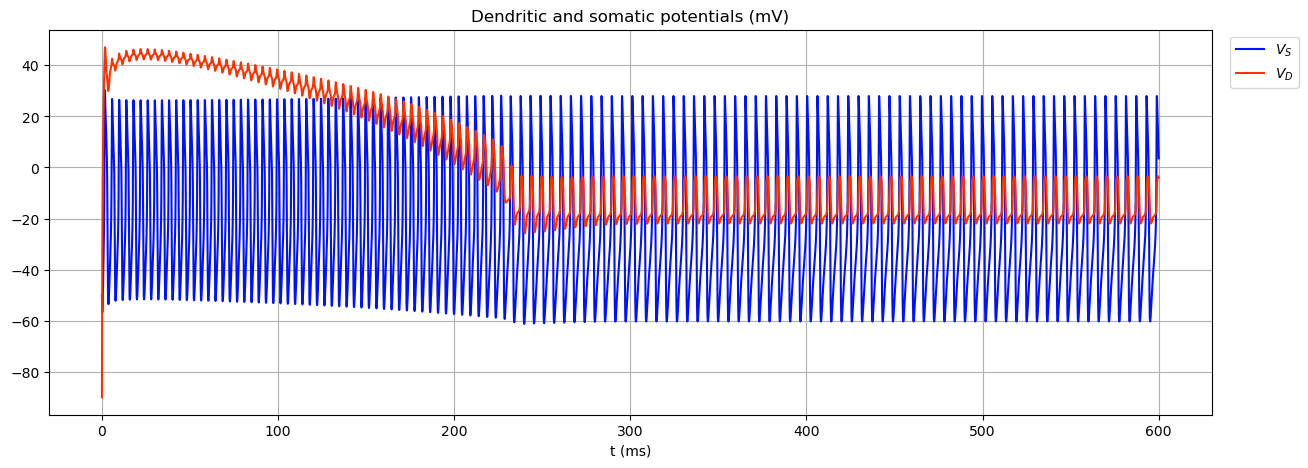

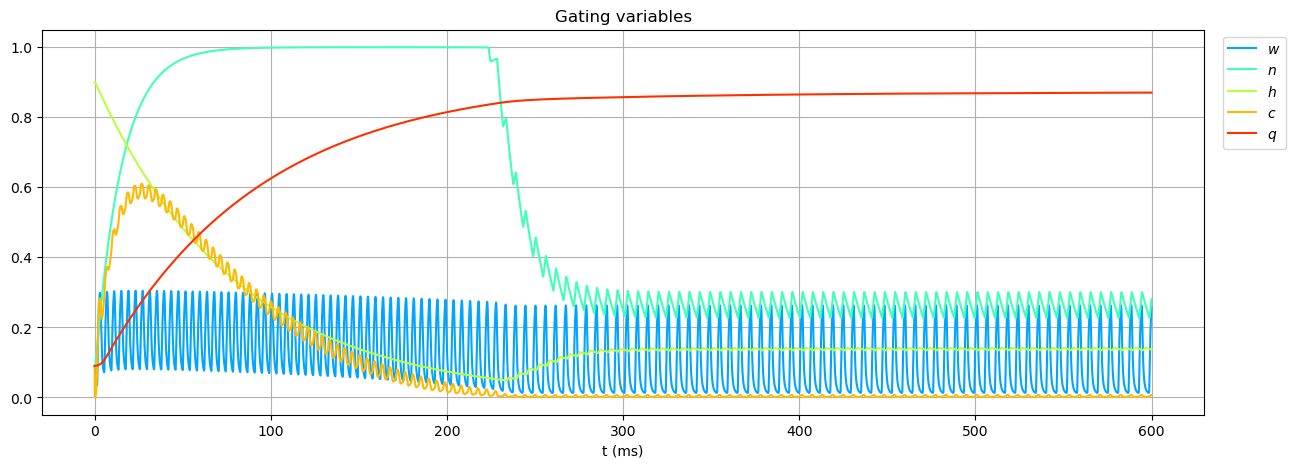

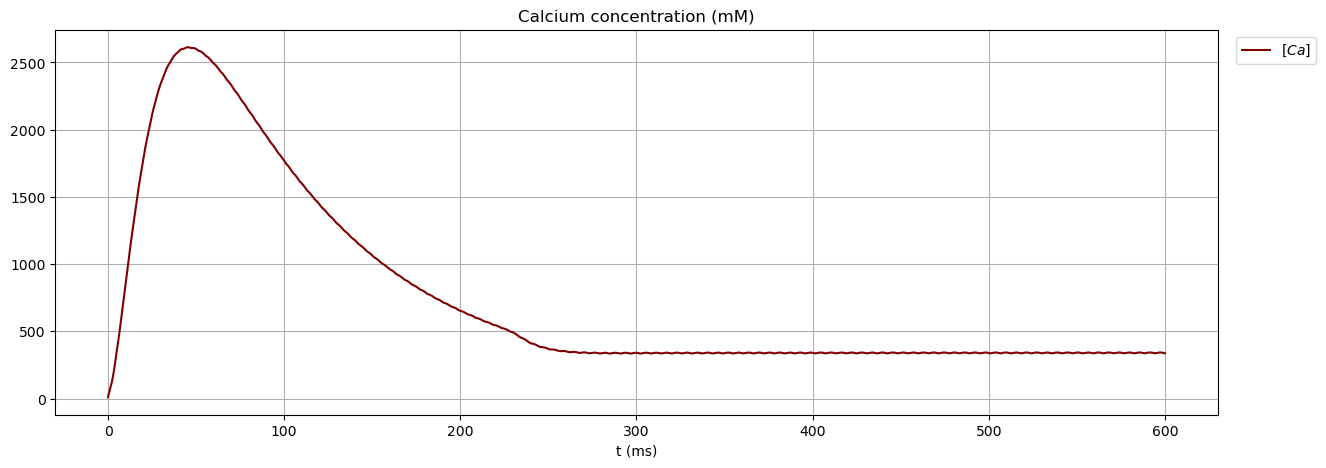

In [4]:
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, 8))
figsize = (15, 5)

plt.figure(figsize=figsize)
plt.plot(sol.t, sol.y[0], label='$V_S$', color=colors[1])
plt.plot(sol.t, sol.y[1], label='$V_D$', color=colors[6])
plt.xlabel('t (ms)')
plt.title('Dendritic and somatic potentials (mV)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

plt.figure(figsize=figsize)
plt.plot(sol.t, sol.y[2], label='$w$', color=colors[2])
plt.plot(sol.t, sol.y[3], label='$n$', color=colors[3])
plt.plot(sol.t, sol.y[4], label='$h$', color=colors[4])
plt.plot(sol.t, sol.y[5], label='$c$', color=colors[5])
plt.plot(sol.t, sol.y[6], label='$q$', color=colors[6])
plt.xlabel('t (ms)')
plt.title('Gating variables')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

plt.figure(figsize=figsize)
plt.plot(sol.t, sol.y[7], label='$[Ca]$', color=colors[7])
plt.xlabel('t (ms)')
plt.title('Calcium concentration (mM)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
plt.show()

In [5]:
IS, ID, IDS, INa, IK, ISL, ICa, IKC, IKAHP, IDL = np.zeros((10, sol.t.shape[0]))

for i in range(sol.t.shape[0]):
    IS_, ID_, IDS_, INa_, IK_, ISL_, ICa_, IKC_, IKAHP_, IDL_ = computeCurrents(sol.t[i], sol.y[:, i], Data)
    IS[i]   = IS_
    ID[i]   = ID_
    IDS[i]  = IDS_
    INa[i]  = INa_
    IK[i]   = IK_
    ISL[i]  = ISL_
    ICa[i]  = ICa_
    IKC[i]  = IKC_
    IKAHP[i]= IKAHP_
    IDL[i]  = IDL_

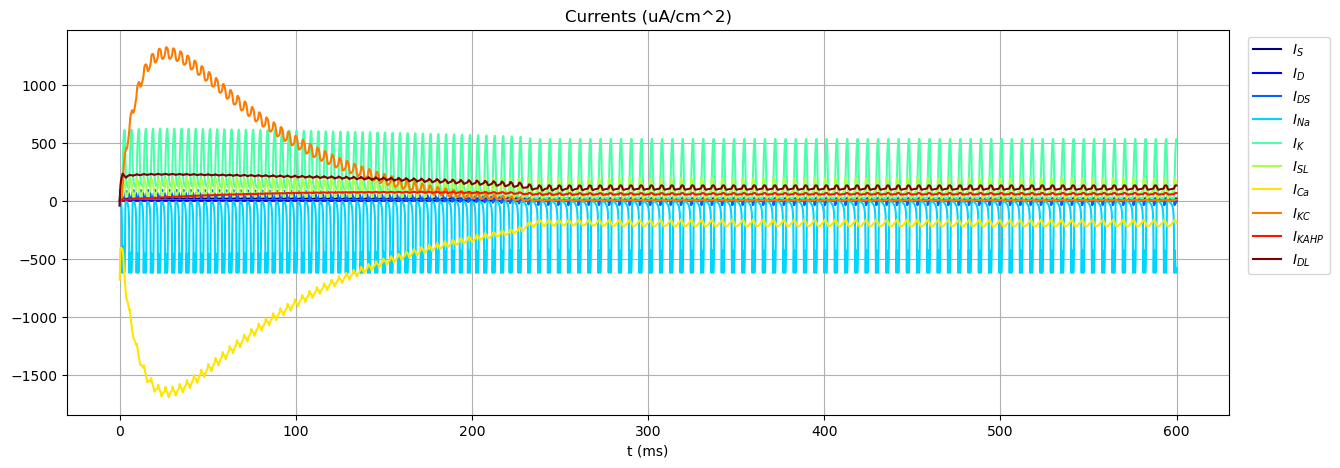

In [6]:
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, 10))
figsize=(15, 5)

plt.figure(figsize=figsize)
plt.plot(sol.t, IS   , label='$I_{S}$'   , color=colors[0])
plt.plot(sol.t, ID   , label='$I_{D}$'   , color=colors[1])
plt.plot(sol.t, IDS  , label='$I_{DS}$'  , color=colors[2])
plt.plot(sol.t, INa  , label='$I_{Na}$'  , color=colors[3])
plt.plot(sol.t, IK   , label='$I_{K}$'   , color=colors[4])
plt.plot(sol.t, ISL  , label='$I_{SL}$'  , color=colors[5])
plt.plot(sol.t, ICa  , label='$I_{Ca}$'  , color=colors[6])
plt.plot(sol.t, IKC  , label='$I_{KC}$'  , color=colors[7])
plt.plot(sol.t, IKAHP, label='$I_{KAHP}$', color=colors[8])
plt.plot(sol.t, IDL  , label='$I_{DL}$'  , color=colors[9])
plt.xlabel('t (ms)')
plt.title('Currents (uA/cm^2)')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.grid()
# plt.ylim(-150, 150)
plt.show()

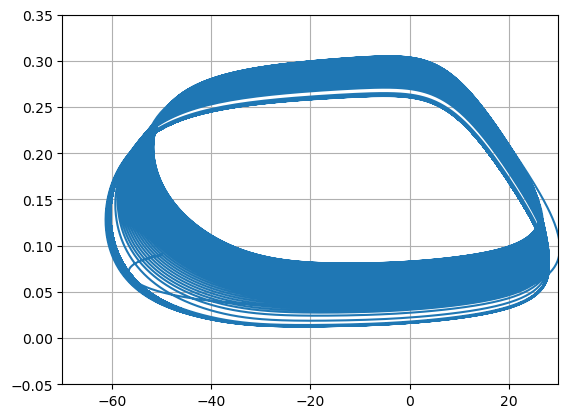

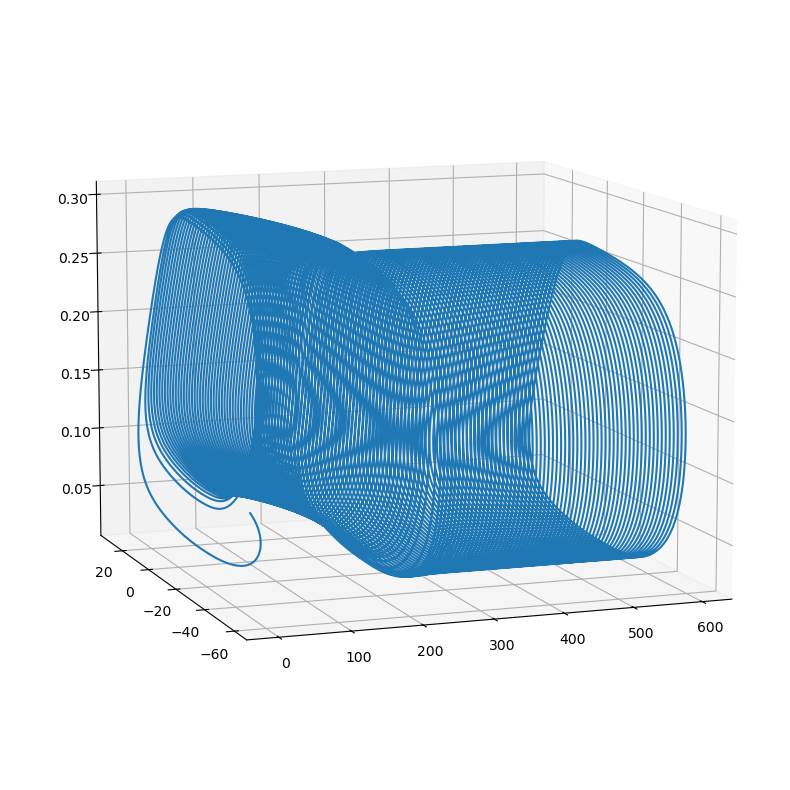

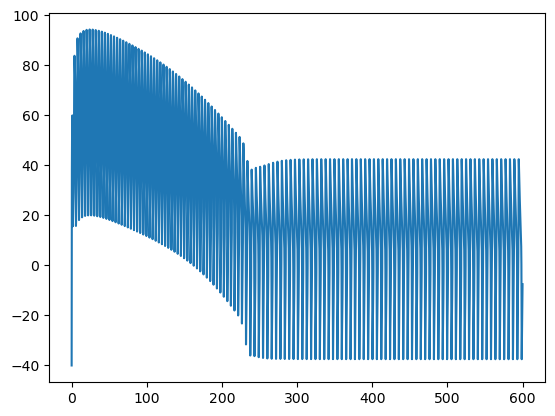

In [7]:
plt.figure()
plt.plot(sol.y[0], sol.y[2])
plt.xlim(-70, 30)
plt.ylim(-0.05, 0.35)
plt.grid()

fig = plt.figure(figsize = (18, 10)) 
ax = plt.axes(projection = '3d')
ax.plot(sol.t, sol.y[0], sol.y[2])
ax.view_init(10, 250)

plt.figure()
plt.plot(sol.t, IDS)